<a href="https://colab.research.google.com/github/rodrigorissettoterra/analise-descritiva-de-retornos-e-volatilidade-no-mercado-de-acoes-brasileiro/blob/main/An%C3%A1lise_descritiva_de_retornos_e_volatilidade_no_mercado_de_a%C3%A7%C3%B5es_brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Informações sobre este projeto

##Objetivo Principal

-   Analisar retornos históricos diários, mensais e anuais de ações negociadas no mercado financeiro brasileiro, com o objetivo de extrair insights financeiros relevantes.
-   Foco em métricas como retornos simples, volatilidade e estatísticas descritivas, considerando empresas ou índices relevantes da B3 (Bolsa de Valores Brasileira).

##Especificações do Projeto

###Seleção de Dados

- Ativos a serem analisados:
  - Índice Bovespa (IBOV), representando o mercado brasileiro.
  - Ações de empresas populares ou de setores específicos (PETR4, VALE3, ITUB4).
- Fonte de Dados:
  - Utilização do Yahoo Finance, que fornece dados de ações brasileiras em tempo real e históricos.

###Intervalo de Tempo

- Analisar os últimos 5 anos de dados, para captar tendências recentes e um histórico suficiente para análises estatísticas.

###Frequência de Dados

- Diária: Para observar variações de curto prazo.
- Mensal: Para identificar tendências de médio prazo.
- Anual: Para identificar tendências de longo prazo.

##Escopo Detalhado

###Coleta de Dados

- Uso da biblioteca yfinance para buscar os dados de ações brasileiras no Yahoo Finance.
- Configuração para capturar:
 - Preço de fechamento diário (Close), usado para calcular os retornos.
 - Outros dados opcionais, como volume de negociação, para análises mais profundas.

###Tratamento e Organização

- Limpeza dos dados:
  - Remoção de valores ausentes.
  - Ajustes para eventos corporativos, como dividendos e splits (se necessário).

- Preparação para cálculos:
  - Retornos diários.
  - Agregação de dados para frequência mensal e anual.

###Cálculo de Métricas

- Retornos: Diários, mensais e anuais.
- Volatilidade: Desvio padrão dos retornos diários.
- Estatísticas Descritivas:
  - Média, mediana, desvio padrão, curtose e assimetria dos retornos.

###Visualizações

- Evolução do Preço: Linha temporal do preço de fechamento.
- Distribuição de Retornos: Histograma para análise de frequência.
- Volatilidade ao Longo do Tempo: Gráfico de desvio padrão móvel.

##Foco no Mercado Brasileiro


Escolha de ativos brasileiros relevantes como exemplo:
 - IBOV: Índice representativo do mercado.
 - PETR4: Petrobras (setor de energia).
 - VALE3: Vale (mineração).
 - ITUB4: Itaú (setor bancário).

#Desenvolvimento do projeto

##Bibliotecas utilizadas

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

##Primeiras configurações

Definições do tickers e intervalos de tempo (dados dos últimos 5 anos)

In [ ]:
tickers = {
    "IBOV": "^BVSP",   # Índice Bovespa
    "PETR4": "PETR4.SA",  # Petrobras (Preferencial)
    "VALE3": "VALE3.SA",  # Vale
    "ITUB4": "ITUB4.SA"   # Itaú
}

##Baixando os dados

Baixando os dados históricos

In [ ]:
# Dicionário para armazenar os dados
dataframes = {}

# Iterar pelos tickers e extrair os dados históricos
for name, ticker in tickers.items():
    df = yf.Ticker(ticker)
    dataframes[name] = df.history(period="5y")  # Últimos 5 anos

In [ ]:
# Combinar os dados de fechamento ajustado em um único DataFrame
close_prices = pd.DataFrame({
    name: dataframes[name]['Close'] for name in dataframes
})

# Salvar os dados em CSV (opcional)
close_prices.to_csv("dados_acoes_brasil_historico.csv")

# Visualizar os dados coletados
print(close_prices.head())

                               IBOV     PETR4      VALE3      ITUB4
Date                                                               
2019-12-27 00:00:00-03:00  116534.0  9.768345  34.351406  30.025171
2019-12-30 00:00:00-03:00  115964.0  9.659526  34.159142  29.864180
2020-01-02 00:00:00-03:00  118573.0  9.825958  34.819248  30.625196
2020-01-03 00:00:00-03:00  117707.0  9.745940  34.562897  30.303061
2020-01-06 00:00:00-03:00  116878.0  9.861163  34.357811  29.852104


##Primeiras visualizações

Visualizando os valores obtidos

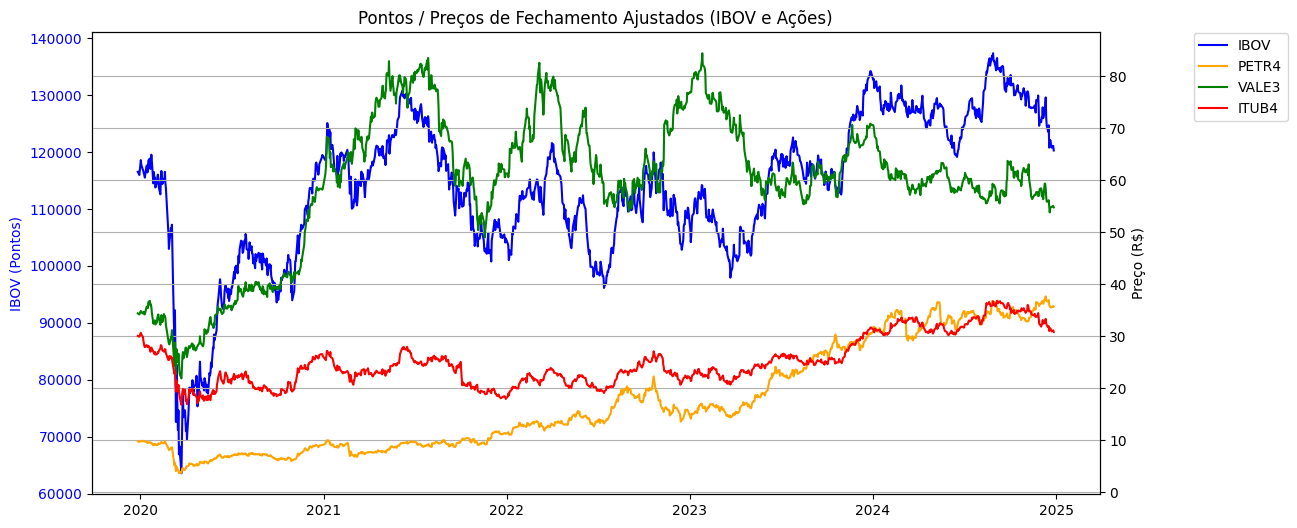

In [ ]:
# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(13, 6))

# Plotar IBOV no eixo principal
ax1.plot(close_prices.index, close_prices["IBOV"], label="IBOV", color="blue")
ax1.set_ylabel("IBOV (Pontos)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_title("Pontos / Preços de Fechamento Ajustados (IBOV e Ações)")

# Criar eixo secundário para as ações
ax2 = ax1.twinx()
ax2.plot(close_prices.index, close_prices["PETR4"], label="PETR4", color="orange")
ax2.plot(close_prices.index, close_prices["VALE3"], label="VALE3", color="green")
ax2.plot(close_prices.index, close_prices["ITUB4"], label="ITUB4", color="red")
ax2.set_ylabel("Preço (R$)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Legendas e exibição
fig.legend(loc="upper right", bbox_to_anchor=(1.05, 0.89))
plt.grid()
plt.show()

Normalizando os valores

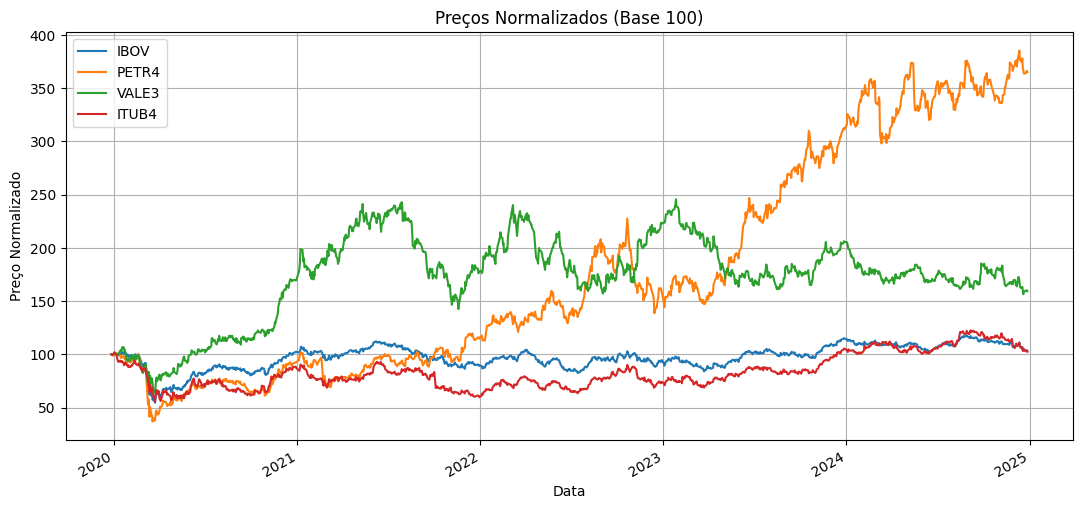

In [ ]:
# Normalizar os preços (dividir pelo preço inicial e multiplicar por 100)
normalized_prices = close_prices / close_prices.iloc[0] * 100

# Plotar os preços normalizados
ax = normalized_prices.plot(figsize=(13, 6), title="Preços Normalizados (Base 100)")
plt.xlabel("Data")
plt.ylabel("Preço Normalizado")

# Adicionar legenda ao lado direito do gráfico
fig.legend(loc="upper right", bbox_to_anchor=(1.05, 0.89))
#plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustar o gráfico para espaço da legenda
plt.grid()
plt.show()

##Tratamento dos dados

In [ ]:
# Verificar dados nulos e duplicados
missing_data = close_prices.isnull().sum()
duplicates = close_prices.duplicated().sum()

# Preencher valores nulos (caso existam)
cleaned_data = close_prices.ffill()

# Remover quaisquer linhas duplicadas, se existirem
cleaned_data = cleaned_data.drop_duplicates()

# Adicionar coluna de retornos diários calculados para cada ativo
returns = cleaned_data.pct_change()

# Estrutura final do DataFrame: preços e retornos
final_data = cleaned_data.copy()
for col in returns.columns:
    final_data[f"{col}_Retorno"] = returns[col]

# Salvar o DataFrame final para análise futura
final_data.to_csv("dados_limpos_com_retornos.csv")

# Exibir resumo da limpeza
print("Dados Nulos por Coluna:")
print(missing_data)
print("\nDuplicados Removidos:")
print(duplicates)
print("\nEstrutura Final do Dataset:")
print(final_data.head())

Dados Nulos por Coluna:
IBOV     0
PETR4    0
VALE3    0
ITUB4    0
dtype: int64

Duplicados Removidos:
0

Estrutura Final do Dataset:
                               IBOV     PETR4      VALE3      ITUB4  \
Date                                                                  
2019-12-27 00:00:00-03:00  116534.0  9.768345  34.351406  30.025171   
2019-12-30 00:00:00-03:00  115964.0  9.659526  34.159142  29.864180   
2020-01-02 00:00:00-03:00  118573.0  9.825958  34.819248  30.625196   
2020-01-03 00:00:00-03:00  117707.0  9.745940  34.562897  30.303061   
2020-01-06 00:00:00-03:00  116878.0  9.861163  34.357811  29.852104   

                           IBOV_Retorno  PETR4_Retorno  VALE3_Retorno  \
Date                                                                    
2019-12-27 00:00:00-03:00           NaN            NaN            NaN   
2019-12-30 00:00:00-03:00     -0.004891      -0.011140      -0.005597   
2020-01-02 00:00:00-03:00      0.022498       0.017230       0.019324   
20

#Cálculos de Retornos

In [ ]:
# 1. Retornos Diários
daily_returns = close_prices.pct_change()

# 2. Retornos Mensais
# Reamostragem para o último valor de fechamento de cada mês
monthly_prices = close_prices.resample('ME').last()
monthly_returns = monthly_prices.pct_change()

# 3. Retornos Anuais
# Reamostragem para o último valor de fechamento de cada ano
annual_prices = close_prices.resample('YE').last()
annual_returns = annual_prices.pct_change()

# Salvar os retornos para análise futura
daily_returns.to_csv("retornos_diarios.csv")
monthly_returns.to_csv("retornos_mensais.csv")
annual_returns.to_csv("retornos_anuais.csv")

# Exibir um resumo dos dados calculados
print("Retornos Diários:")
print(daily_returns.head())

print("\nRetornos Mensais:")
print(monthly_returns.head())

print("\nRetornos Anuais:")
print(annual_returns.head())

Retornos Diários:
                               IBOV     PETR4     VALE3     ITUB4
Date                                                             
2019-12-27 00:00:00-03:00       NaN       NaN       NaN       NaN
2019-12-30 00:00:00-03:00 -0.004891 -0.011140 -0.005597 -0.005362
2020-01-02 00:00:00-03:00  0.022498  0.017230  0.019324  0.025483
2020-01-03 00:00:00-03:00 -0.007304 -0.008144 -0.007362 -0.010519
2020-01-06 00:00:00-03:00 -0.007043  0.011823 -0.005934 -0.014882

Retornos Mensais:
                               IBOV     PETR4     VALE3     ITUB4
Date                                                             
2019-12-31 00:00:00-03:00       NaN       NaN       NaN       NaN
2020-01-31 00:00:00-03:00 -0.018997 -0.057323 -0.056848 -0.115006
2020-02-29 00:00:00-03:00 -0.084291 -0.109315 -0.118560 -0.010476
2020-03-31 00:00:00-03:00 -0.299044 -0.447908 -0.024599 -0.278099
2020-04-30 00:00:00-03:00  0.102520  0.290207  0.037945 -0.013217

Retornos Anuais:
                     

Resultados alcançados:
- Retornos Diários: Variação percentual de um dia para o seguinte.
- Retornos Mensais: Variação percentual entre o último dia útil de cada mês.
- Retornos Anuais: Variação percentual entre o último dia útil de cada ano.

##Estatística Descritiva

In [ ]:
# Estatísticas Descritivas
daily_stats = daily_returns.describe()
monthly_stats = monthly_returns.describe()
annual_stats = annual_returns.describe()

Diária

In [ ]:
# Exibir Estatísticas Descritivas
print("Estatísticas Descritivas dos Retornos Diários:")
print(daily_stats)

Estatísticas Descritivas dos Retornos Diários:
              IBOV        PETR4        VALE3        ITUB4
count  1244.000000  1244.000000  1244.000000  1244.000000
mean      0.000159     0.001448     0.000652     0.000225
std       0.016252     0.028082     0.023671     0.020198
min      -0.147797    -0.296978    -0.151984    -0.179643
25%      -0.007377    -0.010476    -0.012020    -0.010502
50%       0.000281     0.001007    -0.000489     0.000000
75%       0.008145     0.015027     0.011969     0.010907
max       0.139082     0.222222     0.213579     0.110593


Mensal

In [ ]:
print("Estatísticas Descritivas dos Retornos Mensais:")
print(monthly_stats)

Estatísticas Descritivas dos Retornos Mensais:
            IBOV      PETR4      VALE3      ITUB4
count  60.000000  60.000000  60.000000  60.000000
mean    0.003167   0.029196   0.011732   0.004756
std     0.069828   0.116568   0.090285   0.091638
min    -0.299044  -0.447908  -0.147146  -0.278099
25%    -0.030891  -0.034697  -0.051715  -0.042238
50%     0.004668   0.021626   0.005936   0.007567
75%     0.054003   0.088095   0.063998   0.071250
max     0.158975   0.314678   0.288191   0.217132


Anual

In [ ]:
print("Estatísticas Descritivas dos Retornos Anuais:")
print(annual_stats)

Estatísticas Descritivas dos Retornos Anuais:
           IBOV     PETR4     VALE3     ITUB4
count  5.000000  5.000000  5.000000  5.000000
mean   0.014585  0.338822  0.141150  0.039518
std    0.137767  0.385973  0.362189  0.293595
min   -0.121402 -0.060949 -0.225300 -0.314049
25%   -0.103708  0.172472 -0.076480 -0.125469
50%    0.028819  0.235103  0.048728 -0.027768
75%    0.049694  0.379368  0.249503  0.241803
max    0.219520  0.968116  0.709299  0.423074


###Visualização dos retornos calculados

Retornos diários

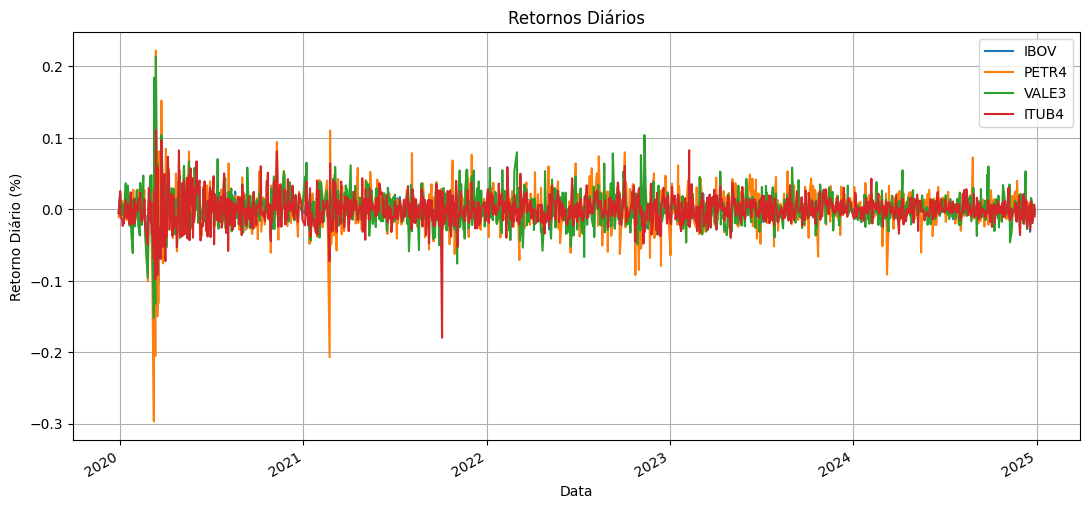

In [18]:
daily_returns.plot(figsize=(13, 6), title="Retornos Diários", legend=True)
plt.xlabel("Data")
plt.ylabel("Retorno Diário (%)")
plt.grid()
plt.show()

Retornos mensais

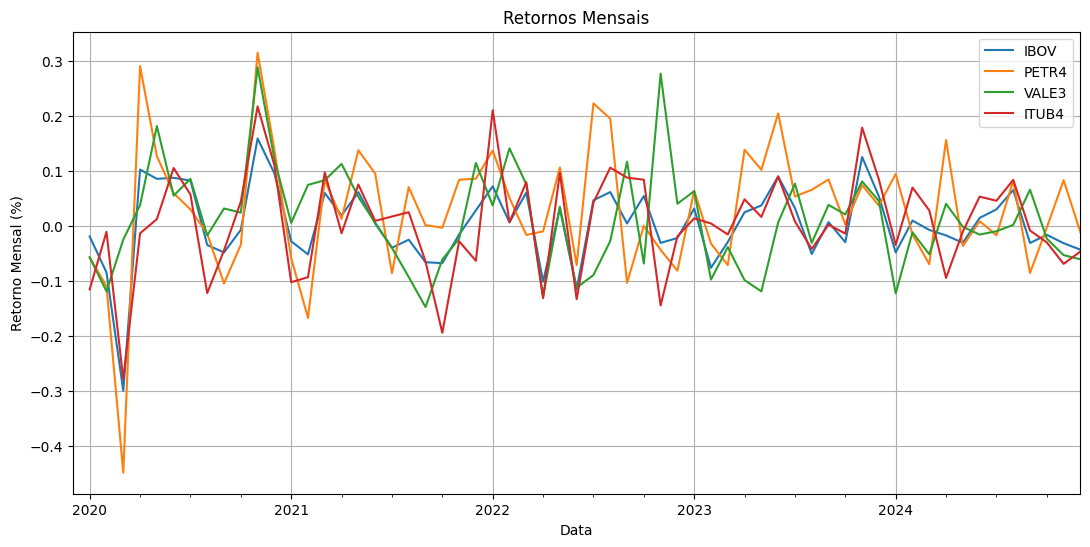

In [19]:
monthly_returns.plot(figsize=(13, 6), title="Retornos Mensais", legend=True)
plt.xlabel("Data")
plt.ylabel("Retorno Mensal (%)")
plt.grid()
plt.show()

Retornos Anuais

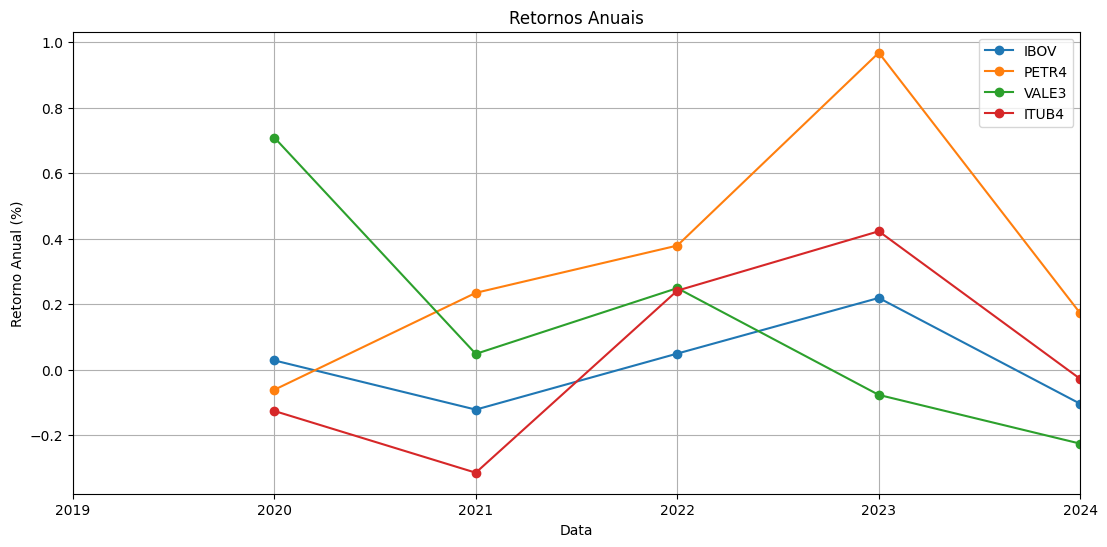

In [20]:
annual_returns.plot(figsize=(13, 6), title="Retornos Anuais", legend=True, marker='o')
plt.xlabel("Data")
plt.ylabel("Retorno Anual (%)")
plt.grid()
plt.show()

###Distribuição de Retornos: Histograma

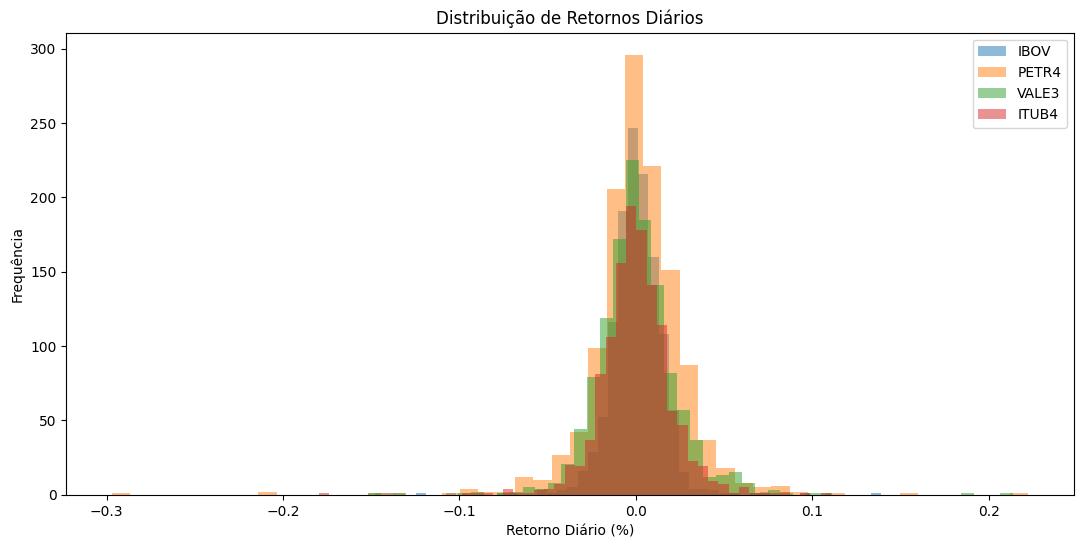

In [21]:
plt.figure(figsize=(13, 6))
for col in daily_returns.columns:
    daily_returns[col].hist(bins=50, alpha=0.5, label=col)
plt.title("Distribuição de Retornos Diários")
plt.xlabel("Retorno Diário (%)")
plt.ylabel("Frequência")
plt.legend(loc="upper right")
plt.grid()
plt.show()

###Volatilidade ao Longo do Tempo: Rolling standard deviation (30 dias)

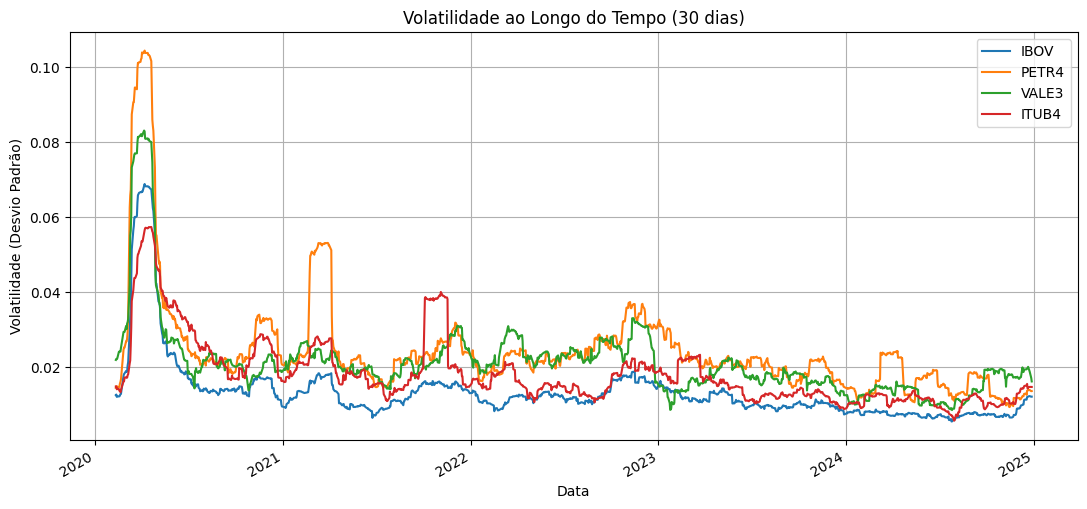

In [22]:
rolling_volatility = daily_returns.rolling(window=30).std()
rolling_volatility.plot(figsize=(13, 6), title="Volatilidade ao Longo do Tempo (30 dias)")
plt.xlabel("Data")
plt.ylabel("Volatilidade (Desvio Padrão)")
plt.grid()
plt.show()

----

#Resultados Obtidos

Este projeto teve como objetivo analisar os retornos e a volatilidade histórica de ativos do mercado financeiro brasileiro, utilizando dados de ações representativas da B3: IBOV, PETR4, VALE3 e ITUB4. A partir de dados históricos coletados do Yahoo Finance, as análises foram organizadas em etapas que envolveram a limpeza e organização dos dados, cálculos estatísticos e visualizações para identificar padrões e comportamentos relevantes no mercado.


- Evolução dos Preços:
  - Observou-se uma tendência geral de crescimento no índice IBOV, enquanto os ativos individuais apresentaram variações significativas, refletindo características setoriais e eventos econômicos.

- Distribuição de Retornos:
  - A distribuição dos retornos diários mostrou uma predominância de variações próximas de 0%, com ocorrência ocasional de movimentos extremos, caracterizando a alta volatilidade do mercado.

- Volatilidade Móvel:
  - A análise da volatilidade indicou picos durante eventos específicos, como crises econômicas ou períodos de instabilidade política, que impactaram o mercado de forma significativa.

- Estatísticas Descritivas:
  - Os retornos diários apresentaram médias próximas de zero, refletindo o comportamento esperado de séries financeiras. Contudo, a volatilidade revelou padrões distintos entre os ativos, com PETR4 e VALE3 sendo os mais voláteis.

#Conclusão

Este projeto forneceu uma base sólida para entender o comportamento de retornos e volatilidade de ativos brasileiros. As análises destacaram a importância de monitorar tanto os movimentos diários quanto os períodos de maior instabilidade para a gestão de riscos. Além disso, as ferramentas e métodos empregados mostraram-se eficazes para explorar dados financeiros e gerar insights relevantes.